In [112]:
import h5py
import matplotlib.pyplot as plt
import os
import sas
import pandas as pd
import numpy as np

In [146]:
# lists all the files in a directory 
directory = r"/home/goughl/Documents/beamtime_data/2304_ISIS/reduced_data"

files = os.listdir(directory)
for file in files:
    file_name = os.path.splitext(file)[0]  
    print(file_name)

230614_SANS_DCV120_all_runs5
230614_SANS_DCV60_all_runs2
230614_SANS_DCV80_all_runs3
230614_SANS_DCV100_half_runs4
230614_SANS_DCV140_all_runs6


In [147]:
# sorts the files in directory in numerical order based on integer at end of filename
# e.g. the files in the directory should be formatted 'filename1.nxs', 'filename2.nxs' .. etc. 
# assigns each file a label and puts it all in a dataframe
directory = r"/home/goughl/Documents/beamtime_data/2304_ISIS/reduced_data"
files = os.listdir(directory)
sorted_files = sorted(
    (file for file in files if file.endswith('.nxs')),
    key=lambda x: int(os.path.splitext(x)[0].split('_')[-1].replace('runs', ''))
)

string_values = ["DCV5T:C60 [2:1] 60°C", "DCV5T:C60 [2:1] 80°C", "DCV5T:C60 [2:1] 100°C", "DCV5T:C60 [2:1] 120°C", "DCV5T:C60 [2:1] 140°C"]
# bit janky but put your labels as strings here
string_values = string_values[:len(sorted_files)] 
# size of label array needs to match number of files in directory

data = {
    "File Name": sorted_files,
    "Labels": string_values
}

df = pd.DataFrame(data)
print(df)

                           File Name                 Labels
0    230614_SANS_DCV60_all_runs2.nxs   DCV5T:C60 [2:1] 60°C
1    230614_SANS_DCV80_all_runs3.nxs   DCV5T:C60 [2:1] 80°C
2  230614_SANS_DCV100_half_runs4.nxs  DCV5T:C60 [2:1] 100°C
3   230614_SANS_DCV120_all_runs5.nxs  DCV5T:C60 [2:1] 120°C
4   230614_SANS_DCV140_all_runs6.nxs  DCV5T:C60 [2:1] 140°C


In [148]:
# # plotting one file with error bars
# with h5py.File(filename, 'r') as f:
#     q = f['mantid_workspace_1/workspace/axis1'][()]  # q values
#     intensity = f['mantid_workspace_1/workspace/values'][()]  # intensity values
#     errors = f['mantid_workspace_1/workspace/errors'][()]  # error values

# intensity_slice = intensity[0]
# error_slice = errors[0]


# q = q[:-1]

# plt.errorbar(q, intensity_slice, yerr=error_slice, fmt='o', markersize=4, capsize=3)
# plt.xlabel('q (1/Å)')
# plt.ylabel('Intensity')
# plt.title('SANS Data with Error Bars')
# plt.show()

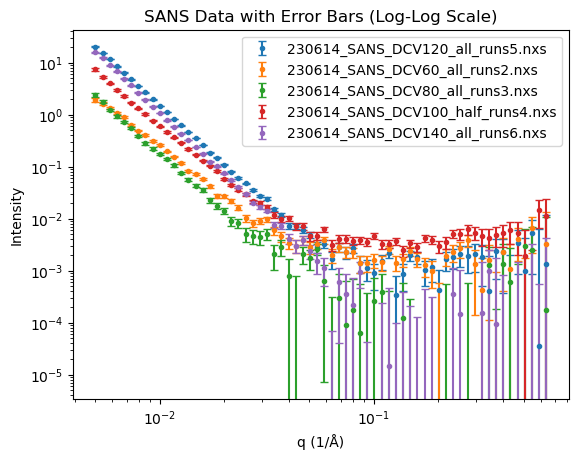

In [149]:
# plot all files in a directory on log-log plot (not normalised!)
file_list = os.listdir(directory)

all_q = []
all_intensity = []
all_errors = []

all_q = []
all_intensity = []
all_errors = []

for file_name in file_list:
    if file_name.endswith('.nxs'):
        file_path = os.path.join(directory, file_name)

        with h5py.File(file_path, 'r') as f:
            q = f['mantid_workspace_1/workspace/axis1'][()]  # q values
            intensity = f['mantid_workspace_1/workspace/values'][()]  # intensity values
            errors = f['mantid_workspace_1/workspace/errors'][()]  # error values

        intensity_slice = intensity[0]
        error_slice = errors[0]

        q = q[:-1]

        all_q.append(q)
        all_intensity.append(intensity_slice)
        all_errors.append(error_slice)

for q, intensity, errors, file_name in zip(all_q, all_intensity, all_errors, file_list):
    plt.errorbar(q, intensity, yerr=errors, fmt='o', markersize=3, capsize=3, label=file_name)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('q (1/Å)')
plt.ylabel('Intensity')
plt.title('SANS Data with Error Bars (Log-Log Scale)')
plt.legend()
plt.show()

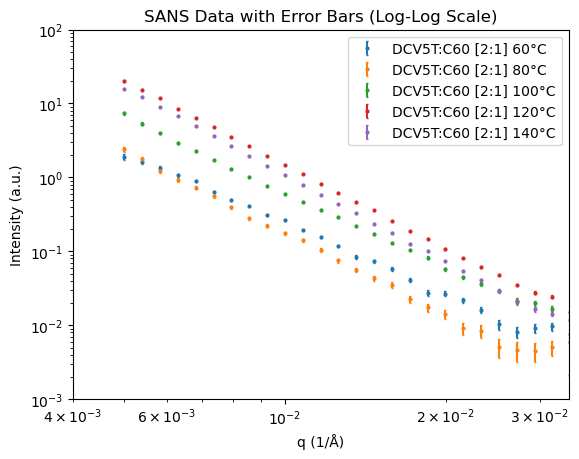

In [151]:
# plots from dataframe with correspodning labels (not normalised)
fig, ax = plt.subplots()

for _, row in df.iterrows():
    file_name = row['File Name']
    string_value = row['Labels']

    file_path = os.path.join(directory, file_name)

    with h5py.File(file_path, 'r') as f:
        q = f['mantid_workspace_1/workspace/axis1'][()]  # q values
        intensity = f['mantid_workspace_1/workspace/values'][()]  # intensity values
        errors = f['mantid_workspace_1/workspace/errors'][()]  # error values

    intensity_slice = intensity[0]
    error_slice = errors[0]

    q = q[:-1]

    ax.errorbar(q, intensity_slice, yerr=error_slice, fmt='o', markersize=2, capsize=1, label=string_value)

ax.set_xscale('log') # comment out to make linear (probably won't need to)
ax.set_yscale('log') # comment out to make linear (more useful)
ax.set_xlim(0.004, 0.034)  # x-axis limits
ax.set_ylim(1e-3, 1e2)  # y-axis limits

plt.xlabel('q (1/Å)')
plt.ylabel('Intensity (a.u.)')
plt.title('SANS Data with Error Bars (Log-Log Scale)')
plt.legend()

plt.show()

In [150]:
# # choose a value of q to normalise to
# fig, ax = plt.subplots()

# reference_q = 1e-2  # choose q val for normalisation

# for _, row in df.iterrows():
#     file_name = row['File Name']
#     string_value = row['Labels']

#     file_path = os.path.join(directory, file_name)

#     with h5py.File(file_path, 'r') as f:
#         q = f['mantid_workspace_1/workspace/axis1'][()]  # q values
#         intensity = f['mantid_workspace_1/workspace/values'][()]  # intensity values
#         errors = f['mantid_workspace_1/workspace/errors'][()]  # error values

#     intensity_slice = intensity[0]
#     error_slice = errors[0]

#     q = q[:-1]

#     reference_index = np.abs(q - reference_q).argmin()
#     normalized_intensity = intensity_slice / intensity_slice[reference_index]

#     ax.errorbar(q, normalized_intensity, yerr=error_slice, fmt='o', markersize=4, capsize=1, label=string_value)
#     ax.plot(q, normalized_intensity, linestyle='-', linewidth=1)

# ax.set_xscale('log')
# #ax.set_yscale('log')
# ax.set_xlim(0.004, 0.05)  # x-axis limits
# ax.set_ylim(-2, 16)  # y-axis limits 
# plt.xlabel('q (1/Å)')
# plt.ylabel('Normalized Intensity')
# plt.title('Normalized SANS Data with Error Bars and Line (Log-Log Scale)')
# plt.legend()

# plt.show()

In [168]:

# # * **Author:**
# # * **Last Modified by:**
# # * **Last Reviewed by:** Steve King & Peter Parker **Date:** September 09, 2013
# # * **Source added by :** Steve King **Date:** March 25, 2019
# # """

# import numpy as np
# from numpy import inf

# name = "dab"
# title = "DAB (Debye Anderson Brumberger) Model"
# description = """\

# F(q)= scale * L^3/(1 + (q*L)^2)^2

# L: the correlation length

# """
# category = "shape-independent"

# #   ["name", "units", default, [lower, upper], "type", "description"],
# parameters = [
#     ["cor_length", "Ang", 50.0, [0, inf], "", "correlation length"],
#     ]

# Iq = """
#     double numerator   = cube(cor_length);
#     double denominator = square(1 + square(q*cor_length));

#     return numerator / denominator ;
#     """

# def random():
#     """Return a random parameter set for the model."""
#     pars = dict(
#         scale=10**np.random.uniform(1, 4),
#         cor_length=10**np.random.uniform(0.3, 3),
#         #background=0,
#     )
#     pars['scale'] /= pars['cor_length']**3
#     return pars

Fitted cor_length: 1.0485398656129976


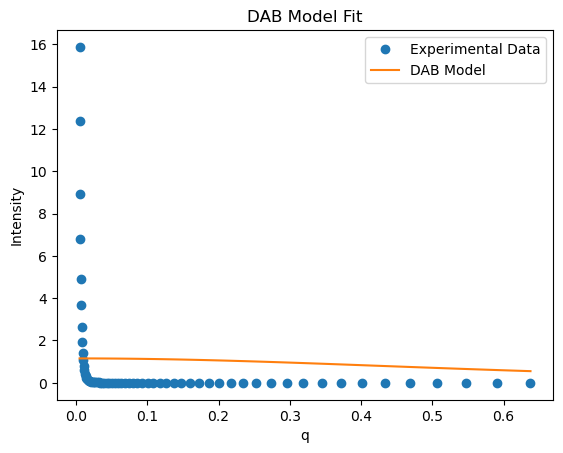

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

q_data = all_q[4]
intensity_data = all_intensity[4]


q = np.array(q_data)
intensity = np.array(intensity_data)

# Fitting function
def dab_model(q, cor_length):
    numerator = cor_length**3
    denominator = (1 + (q * cor_length)**2)**2
    return numerator / denominator

# Perform the fitting
initial_guess = [1]  # Initial guess for cor_length
fit_params, _ = curve_fit(dab_model, q, intensity, p0=initial_guess)

# Retrieve the fitted parameters
cor_length_fit = fit_params[0]
print("Fitted cor_length:", cor_length_fit)

# Calculate the model form factor
q_model = np.linspace(min(q), max(q), 100)
intensity_model = dab_model(q_model, cor_length_fit)

# Plot the results
plt.plot(q, intensity, 'o', label='Experimental Data')
plt.plot(q_model, intensity_model, label='DAB Model')
plt.xlabel('q')
plt.ylabel('Intensity')
plt.title('DAB Model Fit')
plt.legend()
plt.show()


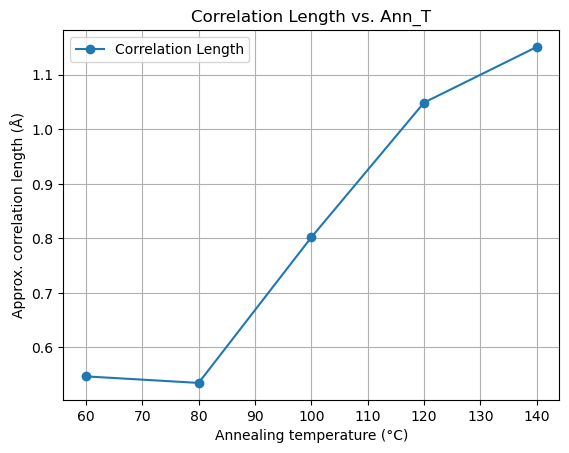

In [187]:
ann_T = [60, 80, 100, 120, 140]
cor_len_approx = [0.547, 0.535, 0.802, 1.049, 1.151]


plt.plot(ann_T, cor_len_approx, 'o-', label='Correlation Length')
plt.xlabel('Annealing temperature (°C)')
plt.ylabel('Approx. correlation length (Å)')
plt.title('Correlation Length vs. Ann_T')
plt.legend()
plt.grid(True)
plt.show()

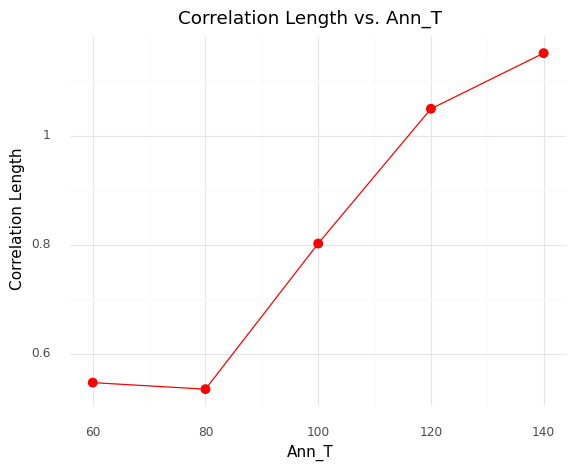

<ggplot: (8779259993209)>

In [192]:
from plotnine import *

ann_T = [60, 80, 100, 120, 140]
cor_len_approx = [0.547, 0.535, 0.802, 1.049, 1.151]

data = pd.DataFrame({'ann_T': ann_T, 'cor_len_approx': cor_len_approx})

(ggplot(data)
 + geom_line(aes(x='ann_T', y='cor_len_approx'), color='red')
 + geom_point(aes(x='ann_T', y='cor_len_approx'), color='red', size=3)
 + labs(x='Ann_T', y='Correlation Length', title='Correlation Length vs. Ann_T')
 + theme_minimal()
)
